# Analyzing the database of orders placed on Zomato

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\KIIT0001\Documents\Python with Data Analytics\Data Library\zomato.csv")
df=df1.copy()
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
#Removing the unimportant columns
df.drop(['address','phone','dish_liked', 'cuisines','reviews_list', 'menu_item','listed_in(city)'],axis=1,inplace=True)

In [6]:
df.sample(5)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
5969,https://www.zomato.com/fatsos?context=eyJzZSI6...,Fatso's,Yes,No,3.8/5,72,Brigade Road,Cafe,650,Dine-out
13085,https://www.zomato.com/bangalore/taaam-cunning...,Ta'aam,Yes,No,4.1/5,402,Cunningham Road,Casual Dining,750,Dine-out
27346,https://www.zomato.com/bangalore/rotti-mane-do...,Rotti Mane,Yes,No,3.4/5,10,Domlur,Quick Bites,200,Delivery
3265,https://www.zomato.com/bangalore/cocoa-bakes-b...,Cocoa Bakes,Yes,No,3.6/5,14,Banashankari,Bakery,350,Desserts
33987,https://www.zomato.com/bangalore/royal-treat-k...,Royal Treat,No,No,4.1 /5,440,Koramangala 5th Block,Casual Dining,500,Dine-out


In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Cleaning of data: Rate

In [8]:
#Removing the /5 from 'rate'
def cleanedrate(ip):
    if (ip=='NEW' or ip=='-'):
        return np.nan
    else:
        ip=str(ip).split('/')
        ip=ip[0]
        return float(ip)

In [9]:
df['rate']=df['rate'].apply(cleanedrate)
df.head(5)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet


In [10]:
df.isnull().sum()

url                                0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [11]:
#Filling up the null rate values with the mean rate
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [12]:
df.isnull().sum()

url                              0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
approx_cost(for two people)    346
listed_in(type)                  0
dtype: int64

In [13]:
#Removing the remaining null values
df.dropna(inplace=True)
df.isnull().sum()

url                            0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [14]:
df.shape

(51167, 10)

In [15]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  object 
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


## Cleaning of data: Approximate cost(for two people)

In [17]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
def cleanedcost(cst):
    cst=str(cst)
    if ',' in cst:
        cst=cst.replace(',','')
        return int(cst)
    else:
        return int(cst)

In [19]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cleanedcost)

In [20]:
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

## Cleaning of data: Restaurant type

In [21]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19048
Casual Dining                 10275
Cafe                           3687
Delivery                       2587
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [22]:
rest_type_df=df['rest_type'].value_counts()
rest_type_df_below1000=rest_type_df[rest_type_df<1000]
rest_type_df_below1000

rest_type
Beverage Shop                 867
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [23]:
def cleaned_rest_type(ip):
    if(ip in rest_type_df_below1000):
        return 'Others'
    else:
        return ip

In [24]:
df['rest_type']=df['rest_type'].apply(cleaned_rest_type)
df['rest_type'].unique()

array(['Casual Dining', 'Others', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery',
       'Casual Dining, Bar'], dtype=object)

In [25]:
df.sample(5)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
48941,https://www.zomato.com/bangalore/basaveshwara-...,Basaveshwara Khanavali,Yes,No,3.600000,12,Sarjapur Road,Quick Bites,150,Delivery
36794,https://www.zomato.com/bangalore/johnny-fox-ho...,Johnny Fox,No,No,3.900000,70,Hosur Road,Others,1500,Dine-out
21632,https://www.zomato.com/bangalore/y-not-shawarm...,Y Not Shawarma,No,No,3.700449,0,BTM,Quick Bites,300,Dine-out
11868,https://www.zomato.com/bangalore/momo-time-uls...,Momo Time,Yes,No,3.700449,0,Ulsoor,"Takeaway, Delivery",300,Delivery
21012,https://www.zomato.com/bangalore/ooty-dreams-b...,Ooty Dreams,No,No,3.700449,0,Bannerghatta Road,Dessert Parlor,250,Desserts


## Cleaning of data: Location

In [26]:
df['location'].value_counts()

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [27]:
location_df=df['location'].value_counts()
location_df_below400=location_df[location_df<400]
location_df_below400

location
Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Kumaraswamy Layout               194
Thippasandra                     191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Hosur Road                       102
Kaggadasapura                    101
CV Raman Nagar               

In [28]:
def cleanedlocation(ip):
    if(ip in location_df_below400):
        return 'Others'
    else:
        return ip

In [29]:
df['location']=df['location'].apply(cleanedlocation)
df['location'].value_counts()

location
Others                   5678
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
Indiranagar              2033
Jayanagar                1916
Marathahalli             1811
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              906
MG Road                   894
Kalyan Nagar              843
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
L

In [30]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25669
Dine-out              17586
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

## Plotting a graph for restaurants delivering online or offline

Text(0.5, 1.0, 'Restaurants delivering online or not')

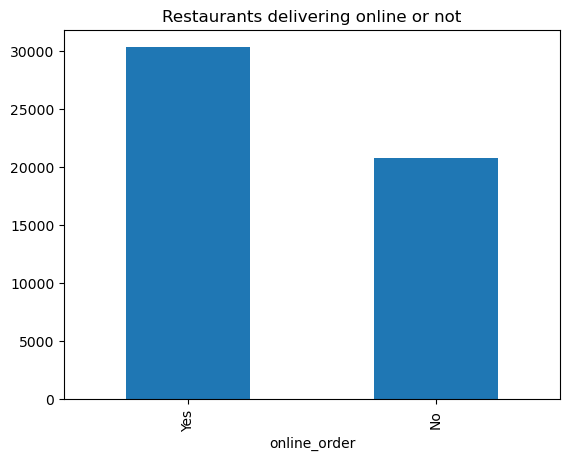

In [31]:
df['online_order'].value_counts().plot(kind='bar')
plt.title('Restaurants delivering online or not')

In [32]:
#Comparing the average rates with and without booking
avg_rate_w_booking=round(df[df['book_table']=='Yes']['rate'].mean(),2)
avg_rate_wo_booking=round(df[df['book_table']=='No']['rate'].mean(),2)
print('Rating with booking is ',avg_rate_w_booking)
print('Rating without booking is ',avg_rate_wo_booking)

Rating with booking is  4.13
Rating without booking is  3.64


## Plotting a graph showing the popular locations

BTM is the best location based on the number of restaurants


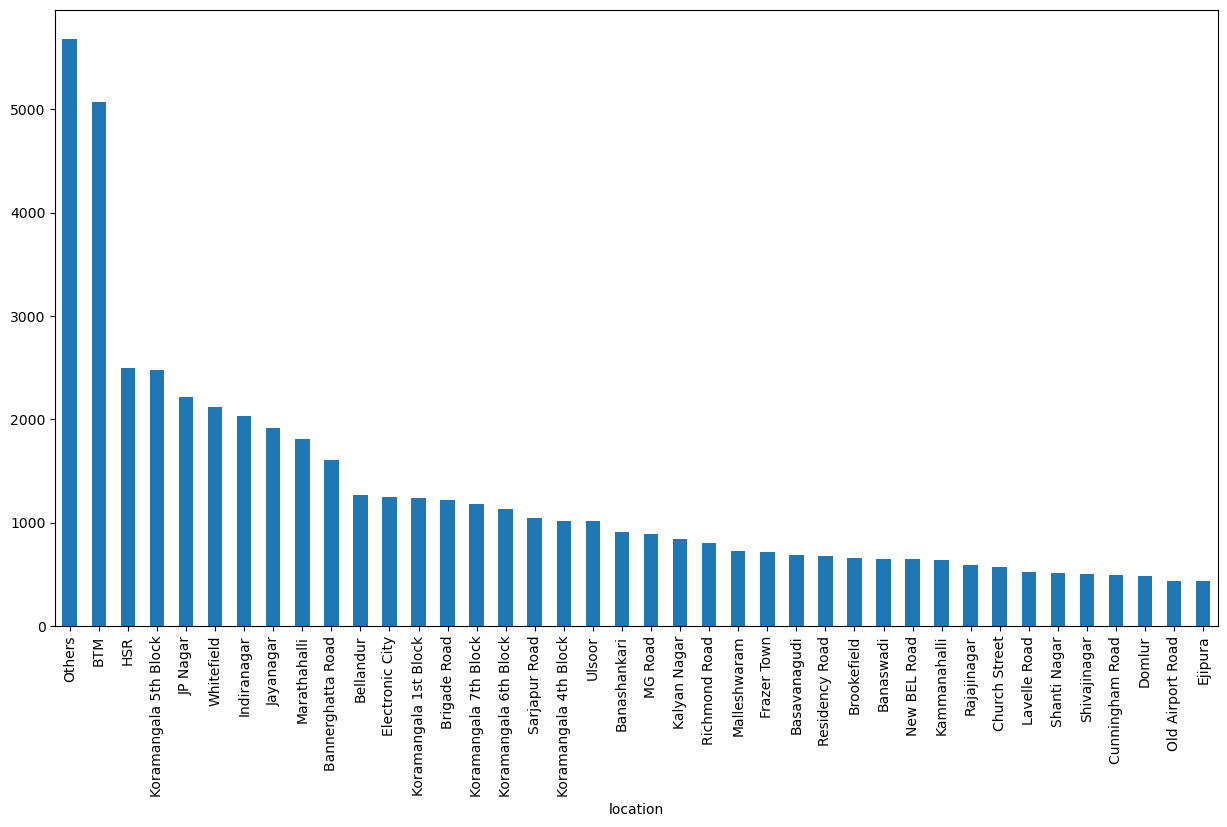

In [33]:
plt.figure(figsize=(15,8))
df['location'].value_counts().plot(kind='bar')
print('BTM is the best location based on the number of restaurants')

Text(0.5, 1.0, 'Popular locations vs Rate')

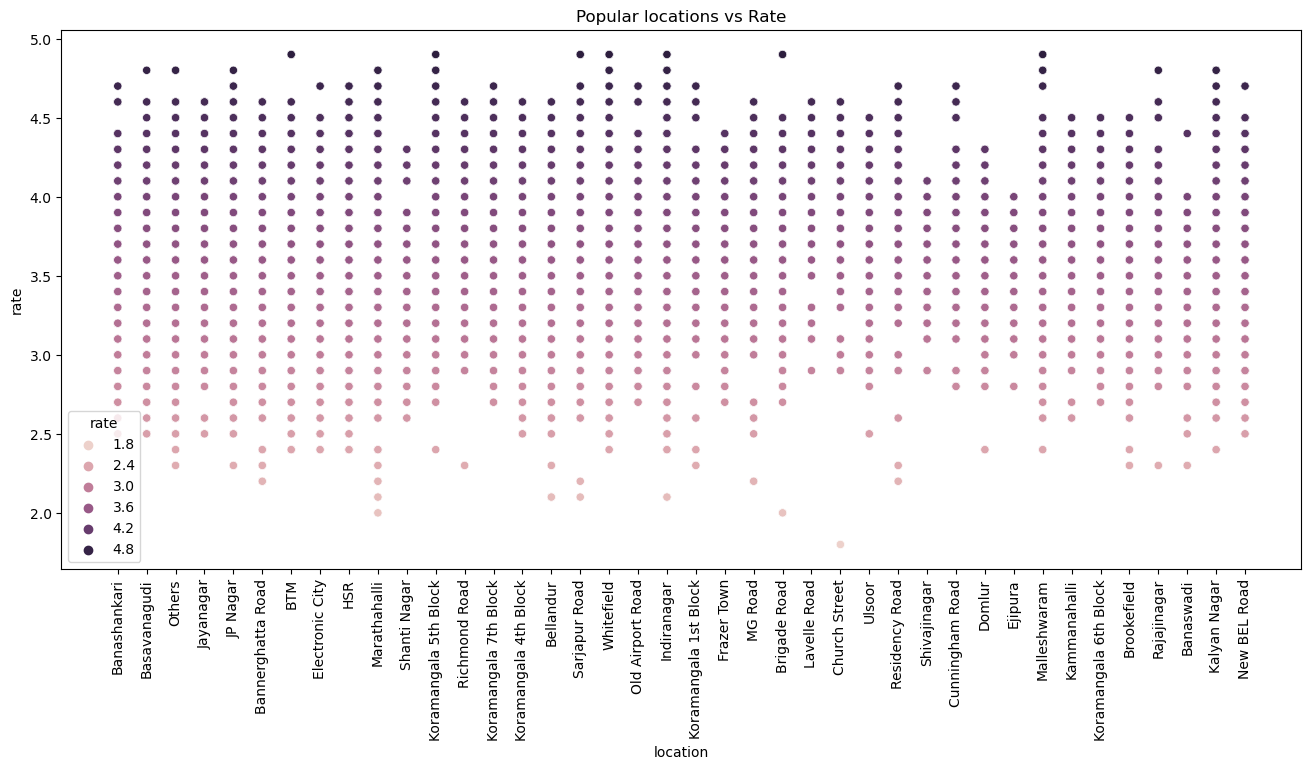

In [34]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=df,x='location',y='rate',hue='rate')
plt.xticks(rotation=90);
plt.title('Popular locations vs Rate')

Text(0.5, 1.0, 'Popular restaurant types')

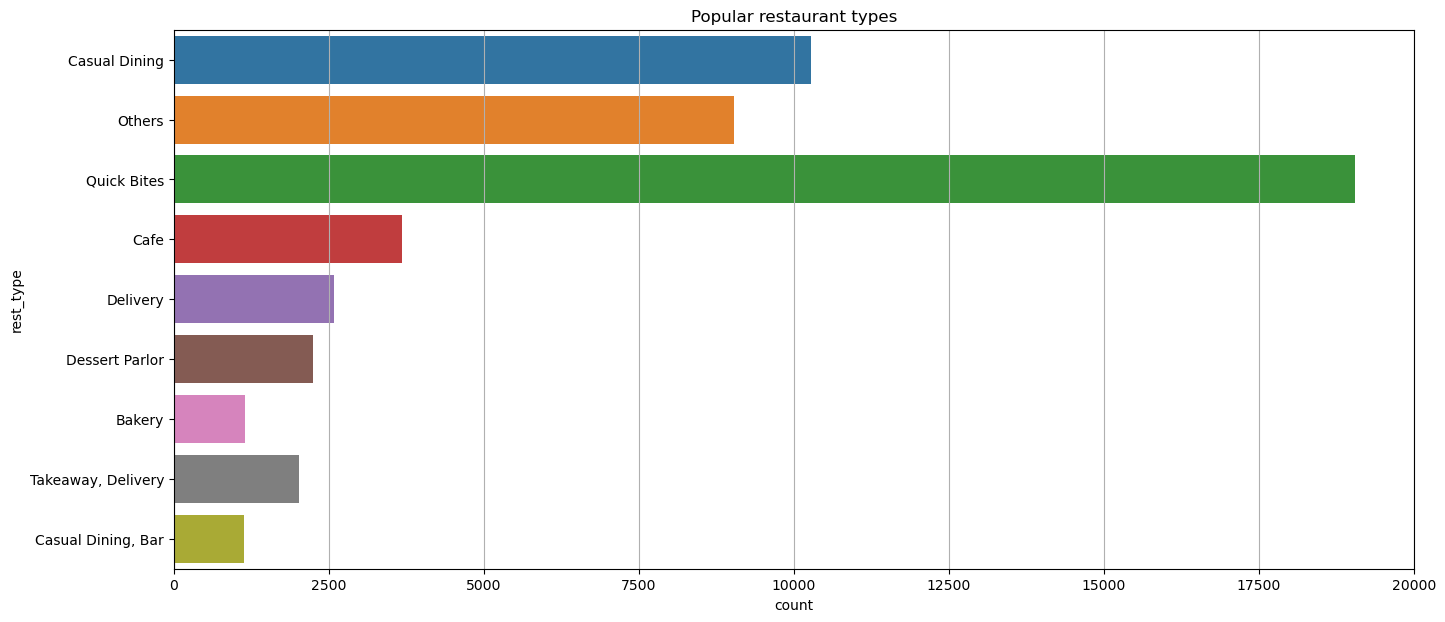

In [35]:
plt.figure(figsize=(16,7))
#df['rest_type'].value_counts().plot(kind='barh')
sns.countplot(data=df,y='rest_type')
plt.grid(axis='x')
plt.title('Popular restaurant types')

## Cost of restaurants

In [36]:
df['approx_cost(for two people)'].value_counts()

approx_cost(for two people)
300     7549
400     6525
500     4940
200     4846
600     3693
        ... 
60         1
5000       1
3700       1
469        1
160        1
Name: count, Length: 70, dtype: int64

In [37]:
#Creating a separate dataframe for restaurant names and average cost for 2 people
rest_cost=df['approx_cost(for two people)'].groupby(df['name'],sort=True)
dict1={}

for i,j in df['name'].value_counts()[:10].to_dict().items():
    dict1[i]=round(rest_cost.get_group(i).mean(),2)
    
cost_df=pd.DataFrame(list(dict1.items()),
                    columns=['Restaurant Names','Avg_2_people_cost'])
cost_df

,Restaurant Names,Avg_2_people_cost
0,Cafe Coffee Day,844.79
1,Onesta,600.00
2,Just Bake,400.00
3,Empire Restaurant,685.21
4,Five Star Chicken,257.86
5,Kanti Sweets,400.00
6,Petoo,659.85
7,Polar Bear,361.54
8,Baskin Robbins,251.56
9,Pizza Hut,736.29


Text(0.5, 1.0, 'Average cost(2 people)-Top 10 restaurants')

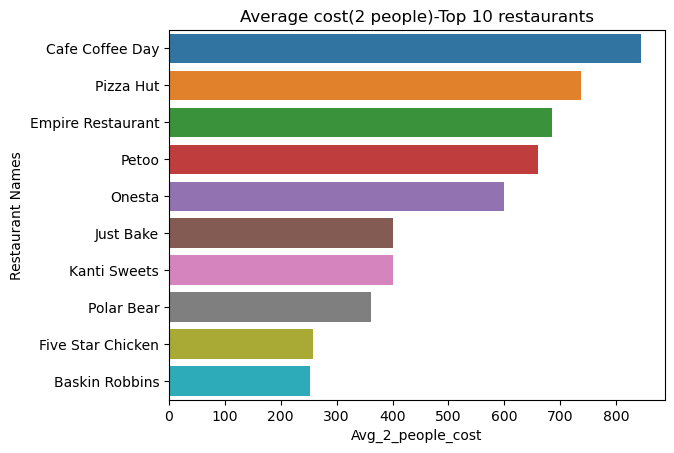

In [38]:
sns.barplot(data=cost_df.sort_values(by=['Avg_2_people_cost'],ascending=False),x='Avg_2_people_cost',y='Restaurant Names')
plt.title('Average cost(2 people)-Top 10 restaurants')

## Most famous restaurant chain in Bengaluru

In [39]:
#Creating a separate dataframe for restaurant names and average rating
rest_famous=df['rate'].groupby(df['name'],sort=True)
dict2={}

for i,j in df['name'].value_counts()[:10].to_dict().items():
    dict2[i]=round(rest_famous.get_group(i).mean(),2)
    
cost_df=pd.DataFrame(list(dict2.items()),
                    columns=['Restaurant Names','Avg_Rating'])
cost_df

,Restaurant Names,Avg_Rating
0,Cafe Coffee Day,3.30
1,Onesta,4.41
2,Just Bake,3.43
3,Empire Restaurant,4.02
4,Five Star Chicken,3.43
5,Kanti Sweets,3.90
6,Petoo,3.82
7,Polar Bear,4.00
8,Baskin Robbins,3.58
9,Pizza Hut,3.39


Text(0.5, 1.0, 'Average Rating-Top 10 restaurants')

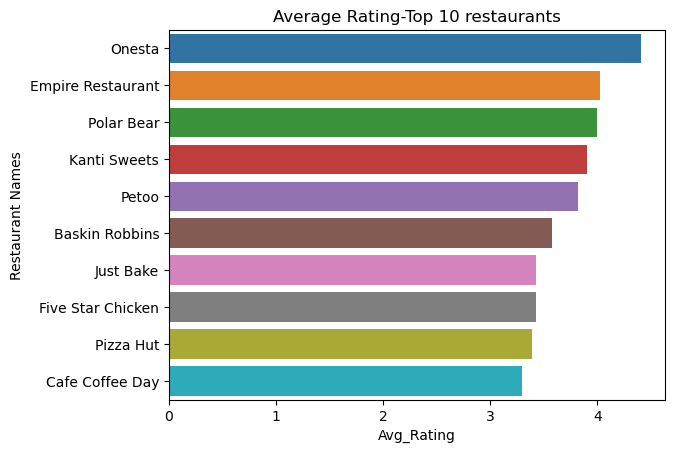

In [40]:
sns.barplot(data=cost_df.sort_values(by=['Avg_Rating'],ascending=False),x='Avg_Rating',y='Restaurant Names')
plt.title('Average Rating-Top 10 restaurants')

Text(0.5, 1.0, 'Top 10 restaurants by value count')

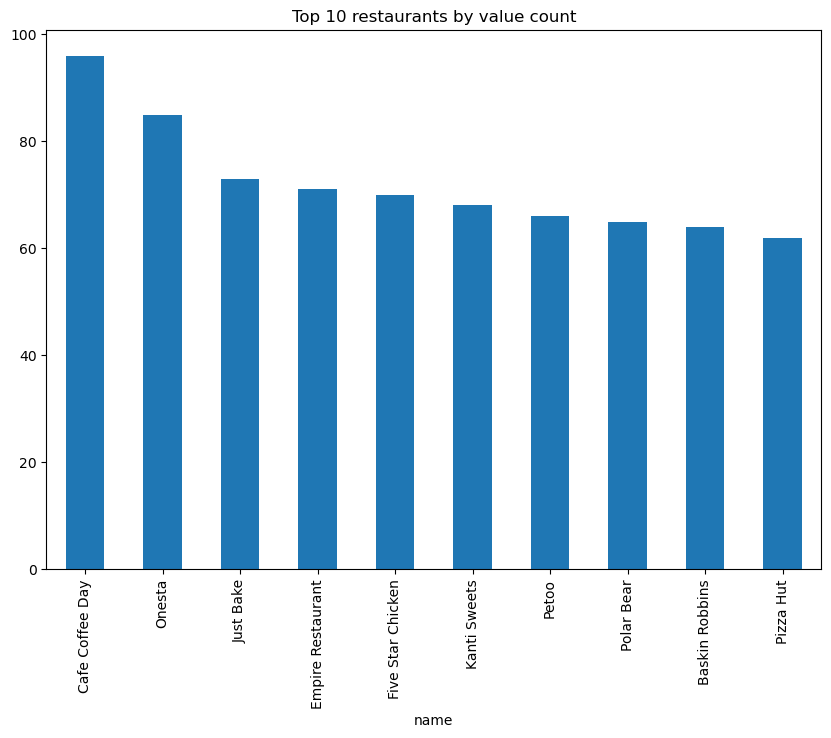

In [41]:
plt.figure(figsize=(10,7))
df['name'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 restaurants by value count')